<a href="https://colab.research.google.com/github/Bo-fromLA/Bo-fromLA/blob/main/regs%2C_eval%2C_fit_trans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practice Project: Insurance Cost Analysis
Estimated time needed: **75** minutes

In this project, you have to perform analytics operations on an insurance database that uses the below mentioned parameters.

Parameter	Description	Content type
age	Age in years	integer
gender	Male or Female	integer (1 or 2)
bmi	Body mass index	float
no_of_children	Number of children	integer
smoker	Whether smoker or not	integer (0 or 1)
region	Which US region - NW, NE, SW, SE	integer (1,2,3 or 4 respectively)
charges	Annual Insurance charges in USD	float

## Objectives
In this project, you will:

- Load the data as a pandas dataframe
- Clean the data, taking care of the blank entries
- Run exploratory data analysis (EDA) and identify the attributes that most affect the charges
- Develop single variable and multi variable - - Linear Regression models for predicting the charges
- Use Ridge regression to refine the performance of Linear regression models.

In [ ]:
#1. necessary libraries

from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline

In [ ]:
#2 loading the data into dataframe, assigning headers with proper names
filepath = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/medical_insurance_dataset.csv'
header = ['age','sex','bmi','no_of_children','smoker','region','charges']
df= pd.read_csv(filepath, names =header, header=0)
df.head(10)

,age,sex,bmi,no_of_children,smoker,region,charges
0,18,2,33.770,1,0,4,1725.55230
1,28,2,33.000,3,0,4,4449.46200
2,33,2,22.705,0,0,1,21984.47061
3,32,2,28.880,0,0,1,3866.85520
4,31,1,25.740,0,?,4,3756.62160
5,46,1,33.440,1,0,4,8240.58960
6,37,1,27.740,3,0,1,7281.50560
7,37,2,29.830,2,0,2,6406.41070
8,60,1,25.840,0,0,1,28923.13692
9,25,2,26.220,0,0,2,2721.32080


In [ ]:
#3 dealing with missing '?' values
df.replace('?', np.nan, inplace = True)
df.head(10)

,age,sex,bmi,no_of_children,smoker,region,charges
0,18,2,33.770,1,0,4,1725.55230
1,28,2,33.000,3,0,4,4449.46200
2,33,2,22.705,0,0,1,21984.47061
3,32,2,28.880,0,0,1,3866.85520
4,31,1,25.740,0,NaN,4,3756.62160
5,46,1,33.440,1,0,4,8240.58960
6,37,1,27.740,3,0,1,7281.50560
7,37,2,29.830,2,0,2,6406.41070
8,60,1,25.840,0,0,1,28923.13692
9,25,2,26.220,0,0,2,2721.32080


In [ ]:
# checking for 'NaN' or 'null'
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2771 entries, 0 to 2770
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2767 non-null   object 
 1   sex             2771 non-null   int64  
 2   bmi             2771 non-null   float64
 3   no_of_children  2771 non-null   int64  
 4   smoker          2764 non-null   object 
 5   region          2771 non-null   int64  
 6   charges         2771 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.7+ KB


age               4
sex               0
bmi               0
no_of_children    0
smoker            7
region            0
charges           0
dtype: int64

Handle missing data:

- For continuous attributes (e.g., age), replace missing values with the mean.
- For categorical attributes (e.g., smoker), replace missing values with the most frequent value.
- Update the data types of the respective columns.
- Verify the update using df.info().

In [ ]:
# dealing with NaN values
df['age'].replace(np.nan, df['age'].astype('float').mean(axis=0), inplace=True)
smokers=df['smoker'].value_counts().idxmax()
df['smoker'].replace(np.nan, smokers, inplace=True)
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2771 entries, 0 to 2770
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2771 non-null   object 
 1   sex             2771 non-null   int64  
 2   bmi             2771 non-null   float64
 3   no_of_children  2771 non-null   int64  
 4   smoker          2771 non-null   object 
 5   region          2771 non-null   int64  
 6   charges         2771 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.7+ KB


age               0
sex               0
bmi               0
no_of_children    0
smoker            0
region            0
charges           0
dtype: int64

Also note, that the charges column has values which are more than 2 decimal places long. Update the charges column such that all values are rounded to nearest 2 decimal places. Verify conversion by printing the first 5 values of the updated dataframe.

In [ ]:
# rounding the decimals
df['charges'] = df['charges'].round(2)
df.head()

,age,sex,bmi,no_of_children,smoker,region,charges
0,18,2,33.770,1,0,4,1725.55
1,28,2,33.000,3,0,4,4449.46
2,33,2,22.705,0,0,1,21984.47
3,32,2,28.880,0,0,1,3866.86
4,31,1,25.740,0,0,4,3756.62


# Task 3 : Exploratory Data Analysis (EDA)
Implement the regression plot for charges with respect to bmi.

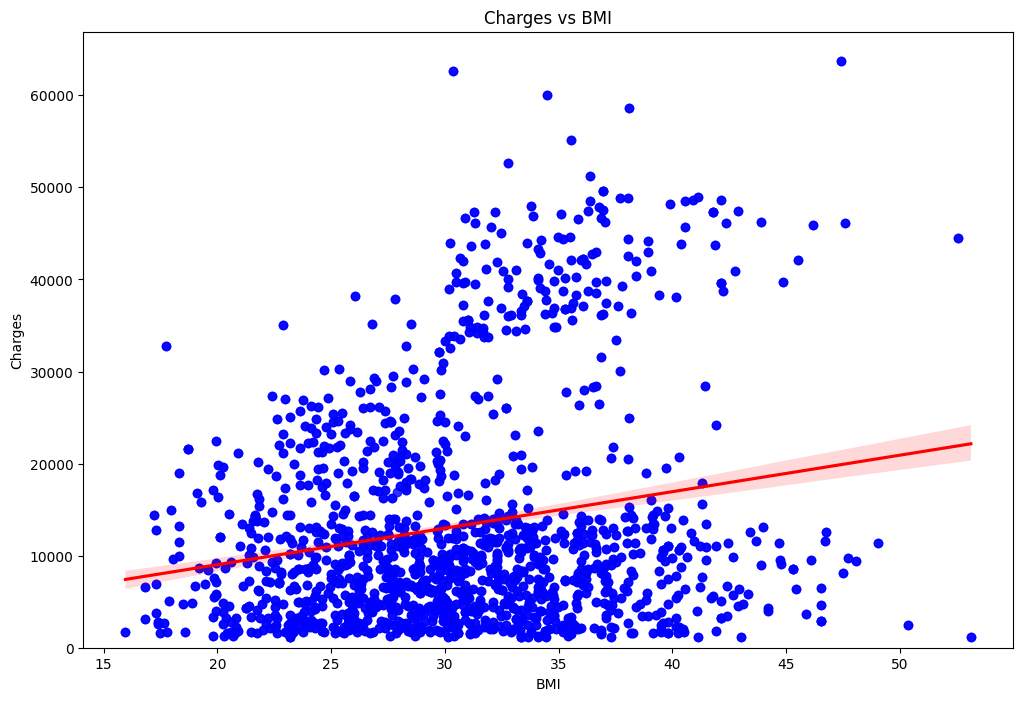

In [ ]:
#creating the regression plot
plt.figure(figsize=(12,8))
sns.regplot(x="bmi", y="charges", data=df, scatter_kws={"color": "blue"},
            line_kws={"color": "red"})
plt.title("Charges vs BMI")
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.ylim(0,)
plt.show()

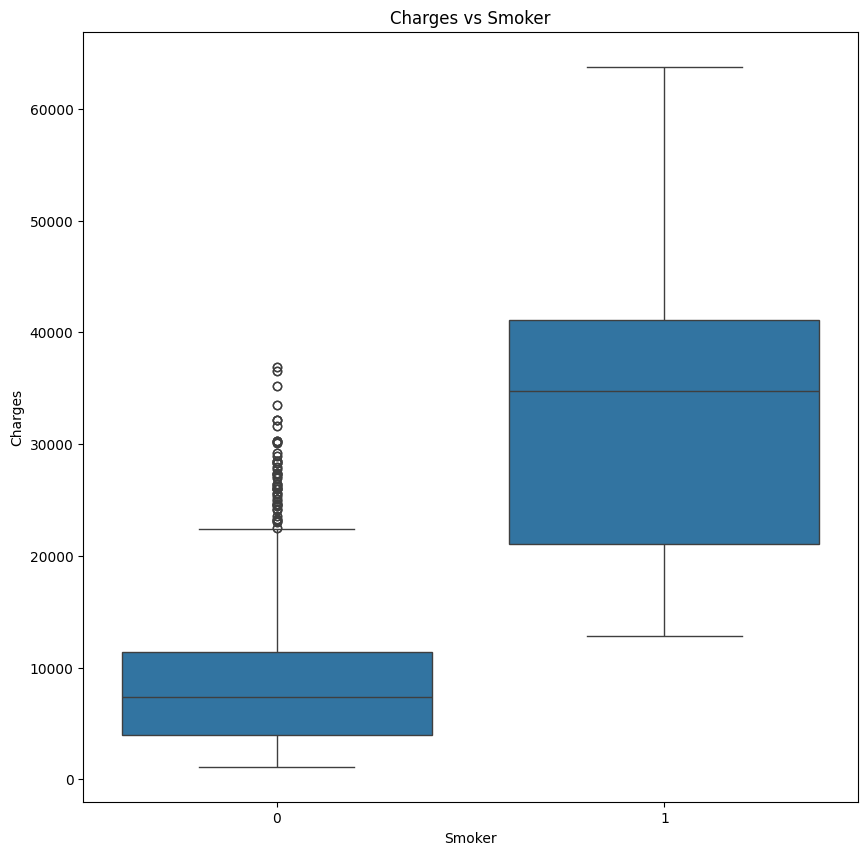

In [ ]:
#creating the box plot
plt.figure(figsize=(10,10))
sns.boxplot(x="smoker", y="charges", data=df)
plt.title("Charges vs Smoker")
plt.xlabel("Smoker")
plt.ylabel("Charges")
plt.show()

In [ ]:
#correlation matrix for the df
df.corr()

,age,sex,bmi,no_of_children,smoker,region,charges
age,1.000000,-0.026578,0.112855,0.037137,-0.022289,-0.006977,0.298890
sex,-0.026578,1.000000,0.042766,0.015693,0.083125,0.022360,0.062959
bmi,0.112855,0.042766,1.000000,-0.001642,0.011824,0.271200,0.199906
no_of_children,0.037137,0.015693,-0.001642,1.000000,0.007016,-0.025594,0.066551
smoker,-0.022289,0.083125,0.011824,0.007016,1.000000,0.053839,0.789141
region,-0.006977,0.022360,0.271200,-0.025594,0.053839,1.000000,0.054018
charges,0.298890,0.062959,0.199906,0.066551,0.789141,0.054018,1.000000


# Task 4 : Model Development
Fit a linear regression model that may be used to predict the charges value, just by using the smoker attribute of the dataset. Print the
 score of this model.

In [ ]:
# SLR
lm= LinearRegression()
X = df[['smoker']]
Y = df['charges']
lm.fit(X,Y)
lm.score(X,Y)
#Output: 0.6227430402464125

0.6227430402464125

Fit a linear regression model that may be used to predict the charges value, just by using all other attributes of the dataset. Print the
 score of this model. You should see an improvement in the performance.

In [ ]:
#MLR
lm= LinearRegression()
X1 = df.drop(['charges'], axis=1)
X1.head()
Y = df['charges']
lm.fit(X1,Y)
lm.score(X1,Y)
#Output: 0.7505807204481766  <-- improvement


0.7505867314418195

Create a training pipeline that uses StandardScaler(), PolynomialFeatures() and LinearRegression() to create a model that can predict the charges value using all the other attributes of the dataset. There should be even further improvement in the performance.

In [ ]:
#Training pipeline
Input=[('scale',StandardScaler()),
        ('polynomial', PolynomialFeatures(include_bias=False)),
        ('model',LinearRegression())];

pipe=Pipeline(Input)
X1=X1.astype('float')
pipe.fit(X1,Y)
pipe.score(X1,Y)
Ypipe=pipe.predict(X1)
Ypipe
print(r2_score(Y,Ypipe))

0.8453698619515811


# Task 5 : Model Refinement
Split the data into training and testing subsets, assuming that 20% of the data will be reserved for testing.

In [ ]:
#different test-size
x_train, x_test, y_train, y_test = train_test_split(X1, Y, test_size=0.20, random_state=1)

Initialize a Ridge regressor that used hyperparameter $ \alpha = 0.1 $
. Fit the model using training data data subset. Print the
 score for the testing data.

In [ ]:
#Ridge regressoor with alpha 0.1
rr=Ridge(alpha=0.1)
rr.fit(x_train,y_train)
rr.score(x_test,y_test)

#or:
# Yhat=rr.predict(x_test)
# r2_score(y_test,Yhat)

0.7254194018864448

Apply polynomial transformation to the training parameters with degree=2. Use this transformed feature set to fit the same regression model, as above, using the training subset. Print the
 score for the testing subset.



In [ ]:
#polynomial transform for the ridge reg

pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train)
x_test_pr=pr.fit_transform(x_test)
rr.fit(x_train_pr,y_train)
Yhat=rr.predict(x_test_pr)
r2_score(y_test,Yhat)
#or
#rr.score(x_test_pr,y_test)

0.8208407204311378

# Congratulations! You have completed this project
## Authors
Abhishek Gagneja

Vicky Kuo